In [1]:
# Import libraries and read data into dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet('../zippedData/merged_data.parquet')

In [2]:
# Create dataframe filtered by last 10 years of data
recent = df.loc[df.release_date.dt.year >= 2012]

# Create dataframe expanded along genres using pd.explode
expanded_genres = recent.explode('genres')

In [3]:
# Create dataframe grouped by genres with mean ROI, mean product budget, and a count of titles in the genre
groupby_genres_mean = expanded_genres.groupby('genres').agg({'ROI': 'mean', 'prod_budget': 'mean', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_mean.title = groupby_genres_mean.title.astype(int)

# Filter by genres that have at least 100 titles in data set
groupby_genres_mean = groupby_genres_mean.loc[groupby_genres_mean.title >= 100]

# Create a dataframe that represents the top 5 genres by mean ROI
top_5_by_mean = groupby_genres_mean.nlargest(5, 'ROI')

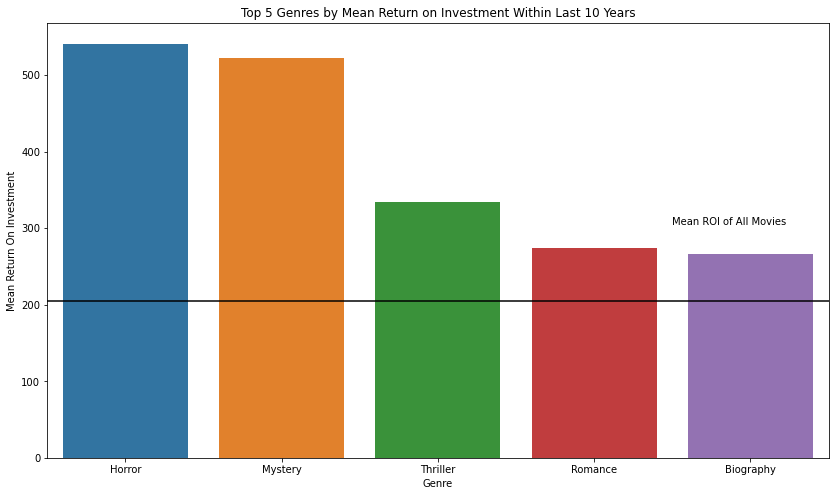

In [4]:
# Create a bar plot representing the top 5 genres by mean ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_5_by_mean, x=top_5_by_mean.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Return On Investment')
ax.set_title('Top 5 Genres by Mean Return on Investment Within Last 10 Years')

# Create a horizontal line representing the mean ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.mean(), c='k')
ax.annotate('Mean ROI of All Movies',(3.5, float(recent.ROI.mean()) + 100));

In [5]:
# Create dataframe grouped by genres with median ROI, median product budget, and a count of titles in the genre
groupby_genres_median = expanded_genres.groupby('genres').agg({'ROI': 'median', 'prod_budget': 'median', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_median.title = groupby_genres_median.title.astype(int)

# Filter by genres that have at least 100 titles in data set
groupby_genres_median = groupby_genres_median.loc[groupby_genres_median.title >= 100]

# Create a dataframe that represents the top 5 genres by median ROI
top_5_by_median = groupby_genres_median.nlargest(5, 'ROI')

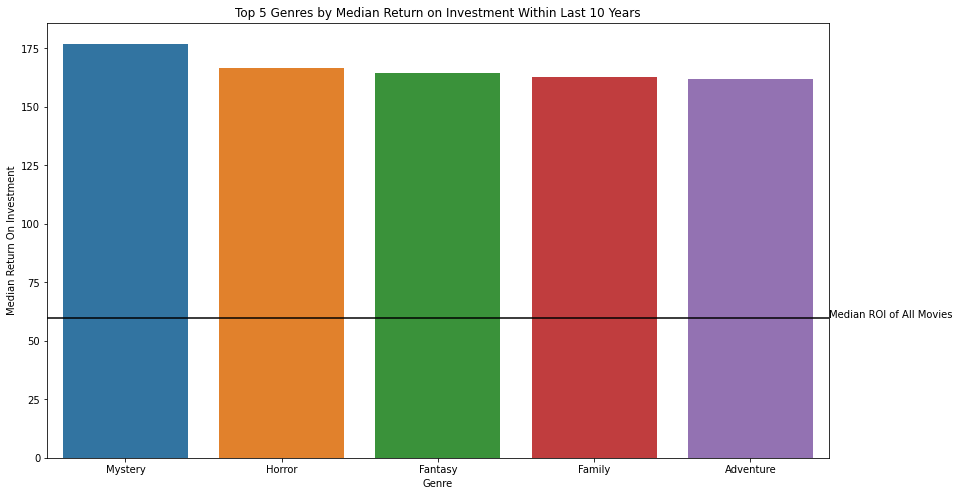

In [6]:
# Create a bar plot representing the top 5 genres by median ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_5_by_median, x=top_5_by_median.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Median Return On Investment')
ax.set_title('Top 5 Genres by Median Return on Investment Within Last 10 Years')

# Create a horizontal line representing the median ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.median(), c='k')
ax.annotate('Median ROI of All Movies',(4.5, recent.ROI.median()));

In [7]:
# Create a dataframe grouped by genres then ROI, reset index to turn back into a dataframe rather than groupby object
# This allows grouping of data without having to use aggregate functions
groupby_genres_ROI = expanded_genres.groupby(['genres', 'ROI']).first()
groupby_genres_ROI = groupby_genres_ROI.reset_index()

In [8]:
# Declare a set of genres to evaluate (selected from the combined list of top 5 by median and top 5 by mean)
genres_to_evaluate = ['Mystery', 'Horror', 'Fantasy', 'Family', 'Adventure', 'Thriller', 'Romance', 'Biography']

# Create dataframes representing the top 8 genres and the 5 genres by median (less influenced by outliers)
top_8_genres_raw_ROI = groupby_genres_ROI.loc[groupby_genres_ROI.genres.isin(genres_to_evaluate)]
top_5_genres_by_median_raw_ROI = top_8_genres_raw_ROI.loc[top_8_genres_raw_ROI.genres.isin(list(top_5_by_median.index))]

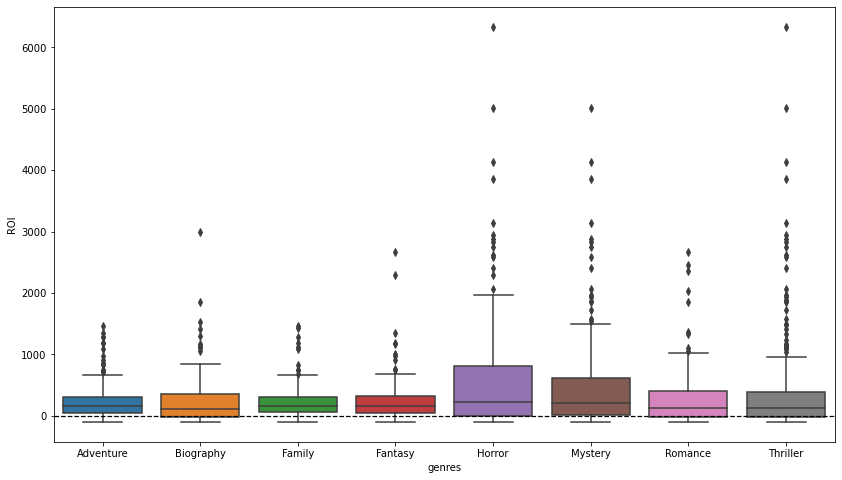

In [9]:
# Create boxplots for each of the top 8 genres
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn boxplot
sns.boxplot(data=top_8_genres_raw_ROI, x='genres', y='ROI', ax=ax)

# Create a horizontal line at ROI = 0 for clarity
ax.axhline(y=0, linestyle='--', linewidth=1.25, c='k');

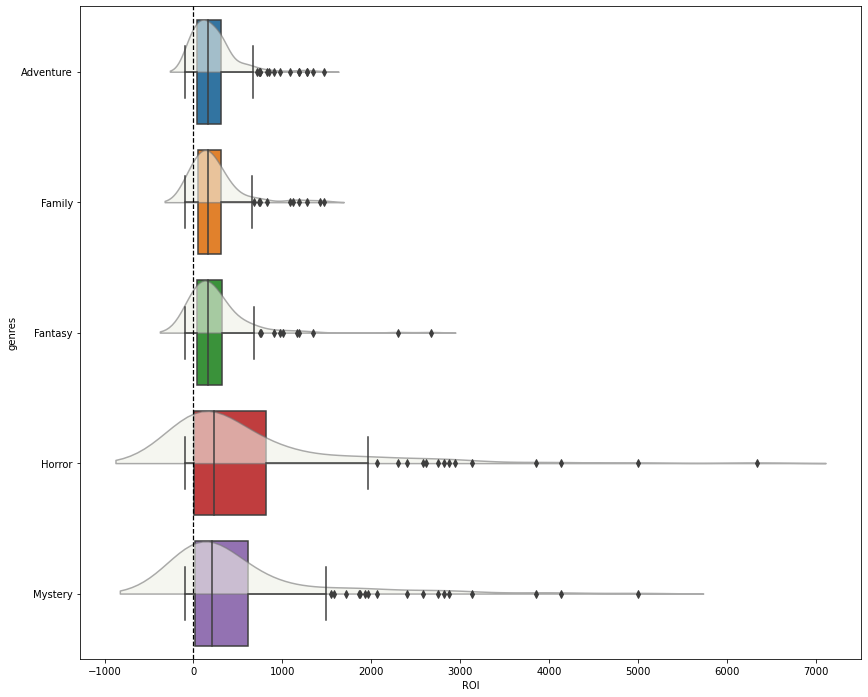

In [10]:
# Create an overlaid boxplot and violinplot for the top 5 genres by median to show distributions
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,12))

# Create seaborn boxplot
sns.boxplot(data=top_5_genres_by_median_raw_ROI, y='genres', x='ROI', orient='h', ax=ax)

# Create seaborn violinplot, forcibly creating a half violin by hueing only on true
sns.violinplot(data=top_5_genres_by_median_raw_ROI,
               orient='h',
               y='genres',
               x='ROI',
               inner='box',
               hue=True,
               hue_order = [True,False],
               split=True,
               color='#e7f294',
               ax=ax);

# Suppress legend created due to tricking violinplot to create half violin
ax.legend_ = None

# Set opacity of violinplot to 0.6
plt.setp(ax.collections, alpha=0.6)

# Create vertical line at ROI = 0 for clarity
ax.axvline(x=0, c='k', linestyle='--', linewidth=1.25)


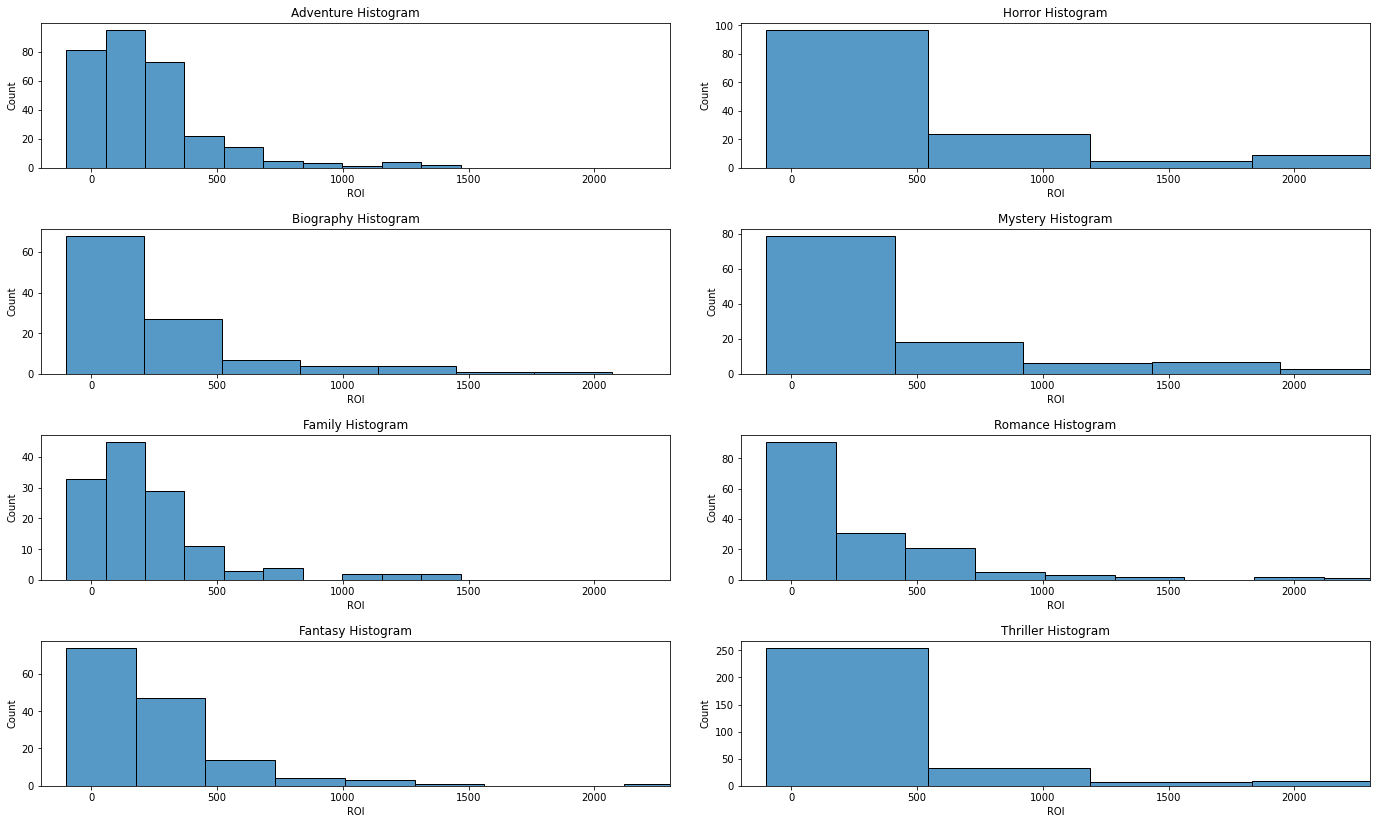

In [11]:
# Create a set of histograms for each of the top 8 genres in one figure
# Declare fig, ax objects, use 4 by 2 shape to accomodate 8 plots
fig, ax = plt.subplots(4,2, figsize=(20,12))

# Set tight layout with padding so labels do not overlap
plt.tight_layout(pad = 4.0)

# For each genre, create a seaborn histplot with 10 bins and correct title labels
for index, genre in enumerate(list(top_8_genres_raw_ROI.genres.unique())):
    axis = ax[index % 4][index // 4]
    sns.histplot(data = top_8_genres_raw_ROI,
                 x = top_8_genres_raw_ROI.loc[top_8_genres_raw_ROI.genres == genre].ROI,
                 common_norm = False,
                 bins = 10,
                 ax = axis);
    axis.set_xlim([-200, 2300])
    axis.set_title('{} Histogram'.format(genre));

# Show plot
plt.show()